Importing Libraries

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

Importing Data and converting categorical features to numerical features

In [11]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/flight_data.csv")
df['Scheduled Departure Time'] = pd.to_datetime(df['Scheduled Departure Time'])
df['Actual Departure Time'] = pd.to_datetime(df['Actual Departure Time'])
df['Departure Delay (minutes)'] = (df['Actual Departure Time'] - df['Scheduled Departure Time']).dt.total_seconds() / 60
df['Flight Number'] = df['Flight Number'].str.extract('(\d+)').astype(int)  # One-Hot Encoding
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD),Departure Delay (minutes)
0,885,2024-05-20 11:51:21,2024-07-10 02:38:54,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84,72887.550000
1,930,2024-01-23 06:56:23,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84,238797.350000
2,478,2024-05-30 09:18:39,2024-12-05 01:00:54,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61,271662.250000
3,637,2024-08-15 05:21:47,2024-09-21 13:23:42,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,9664.17,3255.23,26468.92,53761.916667
4,318,2024-07-25 15:29:58,2024-03-21 15:05:54,30,13.46,114,50.36,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,2320.22,6975.65,-23137.50,-181464.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,73,2024-09-04 21:05:15,2024-01-13 21:04:10,28,14.86,38,60.12,97.56,8.44,2.16,20903.43,11668.11,24.11,856.06,0.53,9677.51,5401.90,9235.32,-338401.083333
199996,732,2024-01-25 21:17:59,2024-01-21 00:57:55,48,8.67,34,77.77,87.05,8.13,3.26,39601.03,29873.77,7.33,1037.92,1.31,12147.56,9163.73,9727.26,-6980.066667
199997,519,2024-10-19 08:31:24,2024-06-04 03:40:50,83,12.80,58,93.12,80.84,9.80,3.68,36100.34,16114.79,21.82,1441.99,2.69,9809.87,4379.02,19985.55,-197570.566667
199998,585,2024-01-04 04:35:20,2024-02-06 01:57:18,55,12.53,115,99.04,85.82,6.84,4.70,8157.56,15878.50,17.93,4584.92,1.26,1735.65,3378.40,-7720.94,47361.966667


Understanding data

In [12]:
df.describe()

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD),Departure Delay (minutes)
count,200000.000000,200000,200000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,499.667210,2024-06-29 07:21:27.048759808,2024-06-29 08:55:04.200095232,59.35885,12.003438,74.451680,74.997178,85.001378,5.503103,3.496959,25571.448338,20429.003323,15.011169,2550.025537,1.752445,7818.578193,6245.613443,5142.445015,93.619189
min,0.000000,2024-01-01 00:01:53,2024-01-01 00:03:34,0.00000,8.000000,30.000000,50.000000,70.000000,1.000000,2.000000,1000.060000,800.030000,5.000000,100.020000,0.500000,203.110000,164.830000,-38973.960000,-519477.383333
25%,250.000000,2024-03-30 22:12:47,2024-03-30 15:40:28.249999872,29.00000,9.990000,52.000000,62.500000,77.480000,3.250000,2.750000,13297.042500,10609.022500,10.010000,1325.570000,1.130000,3812.782500,3041.547500,-7983.690000,-151500.054167
50%,499.000000,2024-06-29 10:33:27,2024-06-28 20:10:25,59.00000,12.010000,74.000000,74.960000,85.000000,5.500000,3.490000,25566.300000,20410.885000,15.000000,2544.210000,1.750000,7315.460000,5834.705000,5216.975000,-267.025000
75%,750.000000,2024-09-27 09:33:27.500000,2024-09-28 03:54:08.500000,89.00000,14.010000,97.000000,87.530000,92.530000,7.760000,4.250000,37860.402500,30245.907500,20.010000,3776.387500,2.370000,10909.272500,8715.670000,18269.647500,151647.958333
max,999.000000,2024-12-27 05:14:39,2024-12-27 05:07:36,119.00000,16.000000,119.000000,100.000000,100.000000,10.000000,5.000000,49999.950000,39999.840000,25.000000,5000.000000,3.000000,24999.340000,19928.340000,49054.690000,519267.750000
std,288.569873,NaN,NaN,34.67602,2.311966,25.977826,14.439393,8.672413,2.601257,0.865309,14158.512116,11316.410641,5.778340,1414.291993,0.720194,4947.028923,3957.358310,18123.595784,212045.974801


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Flight Number                     200000 non-null  int64         
 1   Scheduled Departure Time          200000 non-null  datetime64[ns]
 2   Actual Departure Time             200000 non-null  datetime64[ns]
 3   Delay (Minutes)                   200000 non-null  int64         
 4   Aircraft Utilization (Hours/Day)  200000 non-null  float64       
 5   Turnaround Time (Minutes)         200000 non-null  int64         
 6   Load Factor (%)                   200000 non-null  float64       
 7   Fleet Availability (%)            200000 non-null  float64       
 8   Maintenance Downtime (Hours)      200000 non-null  float64       
 9   Fuel Efficiency (ASK)             200000 non-null  float64       
 10  Revenue (USD)                   

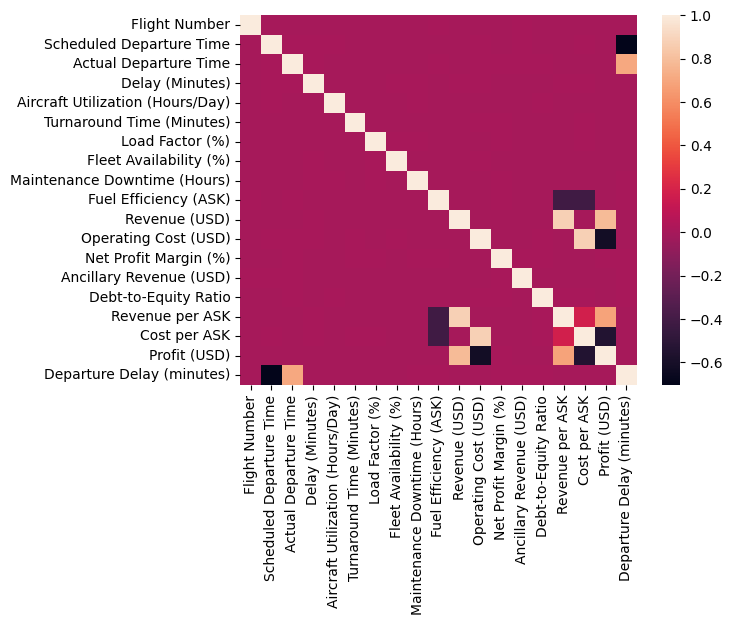

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr())
plt.show()

Profit is correlated with Revenue, Operating Cost, Cost per ASK and Revenue per ASK

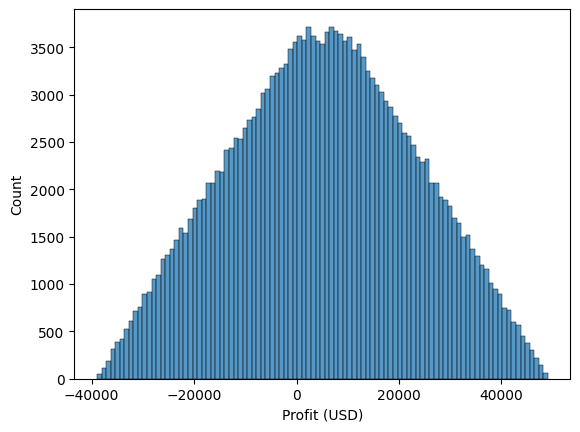

In [15]:
sns.histplot(df["Profit (USD)"])
plt.show()

Splitting Profit with the other features.

In [16]:
X = df.drop(columns=["Profit (USD)"])
y = df["Profit (USD)"]
X

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Departure Delay (minutes)
0,885,2024-05-20 11:51:21,2024-07-10 02:38:54,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,72887.550000
1,930,2024-01-23 06:56:23,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,238797.350000
2,478,2024-05-30 09:18:39,2024-12-05 01:00:54,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,271662.250000
3,637,2024-08-15 05:21:47,2024-09-21 13:23:42,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,9664.17,3255.23,53761.916667
4,318,2024-07-25 15:29:58,2024-03-21 15:05:54,30,13.46,114,50.36,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,2320.22,6975.65,-181464.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,73,2024-09-04 21:05:15,2024-01-13 21:04:10,28,14.86,38,60.12,97.56,8.44,2.16,20903.43,11668.11,24.11,856.06,0.53,9677.51,5401.90,-338401.083333
199996,732,2024-01-25 21:17:59,2024-01-21 00:57:55,48,8.67,34,77.77,87.05,8.13,3.26,39601.03,29873.77,7.33,1037.92,1.31,12147.56,9163.73,-6980.066667
199997,519,2024-10-19 08:31:24,2024-06-04 03:40:50,83,12.80,58,93.12,80.84,9.80,3.68,36100.34,16114.79,21.82,1441.99,2.69,9809.87,4379.02,-197570.566667
199998,585,2024-01-04 04:35:20,2024-02-06 01:57:18,55,12.53,115,99.04,85.82,6.84,4.70,8157.56,15878.50,17.93,4584.92,1.26,1735.65,3378.40,47361.966667


Scaling the data

In [17]:
numerical_features = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_features])
X_scaled

array([[ 1.33532218, -0.26989468,  0.15422512, ..., -1.0469175 ,
         0.11741361,  0.34329401],
       [ 1.49126401, -0.93317892,  1.09282271, ...,  0.04476068,
        -1.4776418 ,  1.12571968],
       [-0.07508498,  1.40273513, -0.5508044 , ..., -0.93036846,
         0.23066116,  1.28070957],
       ...,
       [ 0.06699535,  0.68177401,  0.34453984, ...,  0.40252378,
        -0.47167781, -0.93217841],
       [ 0.29571002, -0.12570246,  0.22775581, ..., -1.22961549,
        -0.72452894,  0.22291612],
       [ 0.31303689,  1.43157358, -1.67106603, ..., -0.87259627,
        -0.09004854,  0.35899662]])

Training the model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2



# Define the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu',kernel_regularizer=l2(0.001)),
    Dense(8, activation='relu',kernel_regularizer=l2(0.001)),
    Dense(4, activation='relu',kernel_regularizer=l2(0.001)),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=75, batch_size=64, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/75
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 179095808.0000 - mae: 8876.9766 - val_loss: 1972335.2500 - val_mae: 1136.0770
Epoch 2/75
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 1751772.0000 - mae: 1054.2498 - val_loss: 782224.5625 - val_mae: 691.4473
Epoch 3/75
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 553140.1875 - mae: 565.9921 - val_loss: 196916.3906 - val_mae: 339.0527
Epoch 4/75
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 156033.8281 - mae: 298.5656 - val_loss: 87046.8906 - val_mae: 230.7335
Epoch 5/75
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 74509.5078 - mae: 208.7808 - val_loss: 46774.4336 - val_mae: 168.4619
Epoch 6/75
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 41854.5703 - mae: 157.5004 - val_loss: 26943.0312 - val_mae: 130.8957
Epoch 7/75
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 22002.3164 - mae: 114.9980 - val_loss: 14852.2881 - val_mae: 96.7886
Epoch 8/75
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - lo

Evaluating the model

In [20]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.2f}")
train_mae = history.history['mae']  # List of MAE values for each epoch
last_train_mae = train_mae[-1]  # Get the final Training MAE
print(f"Final Training MAE: {last_train_mae:.2f}")


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 24.7915 - mae: 3.9793
Test MAE: 3.94
Final Training MAE: 6.77


In [21]:
# Calculate the mean of the target variable (y_test)
y_test_mean = np.mean(y_test)

# Calculate percentage accuracy based on MAE and mean
percentage_accuracy_mae = (1 - (test_mae / y_test_mean)) * 100

print(f"Percentage Accuracy (MAE-based): {percentage_accuracy_mae:.2f}%")# Calculate the mean of the target variable (y_test)
y_test_mean = np.mean(y_test)

# Calculate percentage accuracy based on MAE and mean
percentage_accuracy_mae = (1 - (test_mae / y_test_mean)) * 100

print(f"Percentage Accuracy (MAE-based): {percentage_accuracy_mae:.2f}%")

Percentage Accuracy (MAE-based): 99.93%
Percentage Accuracy (MAE-based): 99.93%


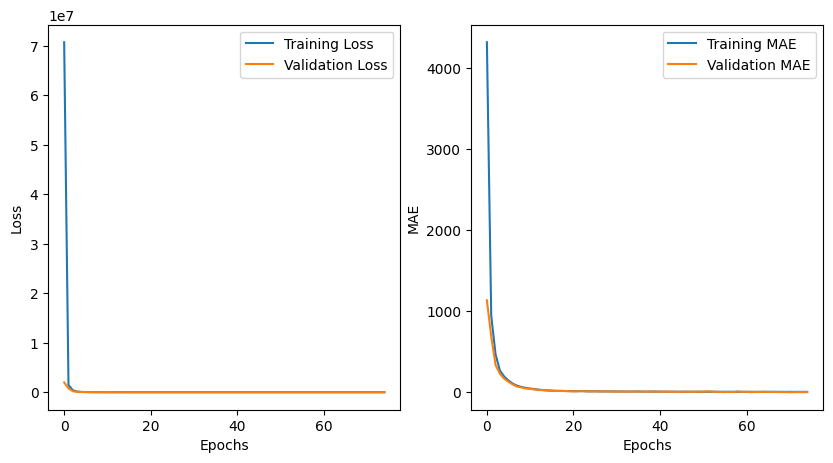

In [22]:
import matplotlib.pyplot as plt

# Assuming you have a trained model with `history`
plt.figure(figsize=(10, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()


In [23]:
from sklearn.metrics import r2_score

# Get model predictions on test data
y_pred = model.predict(X_test)

# Compute R² Score
r2 = r2_score(y_test, y_pred)

# Convert to percentage accuracy
percentage_accuracy_r2 = r2 * 100

print(f"Percentage Accuracy (R-squared): {percentage_accuracy_r2:.2f}%")


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Percentage Accuracy (R-squared): 100.00%


In [25]:
import shap

# Assuming 'model' and 'X_train' are defined
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

feature_names=["Flight Number","Delay (Minutes)","Aircraft Utilization (Hours/Day)","Turnaround Time (Minutes)","Load Factor (%)","Fleet Availability (%)","Maintenance Downtime (Hours)","Fuel Efficiency (ASK)","Revenue (USD)","Operating Cost (USD)","Net Profit Margin (%)","Ancillary Revenue (USD)","Debt-to-Equity Ratio","Revenue per ASK","Cost per ASK","Profit (USD)","Departure Delay (minutes)"]
shap_values.feature_names = feature_names
# Visualize feature importance
shap.summary_plot(shap_values, X_train)

PermutationExplainer explainer:   0%|          | 47/160000 [00:16<18:19:54,  2.42it/s]


KeyboardInterrupt: 

In [ ]:

shap.summary_plot(shap_values, X_test, plot_type="bar")


In [26]:
model.save("airline_profit_model2.h5")